In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [100]:
df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_cleaned_v2.csv")

In [101]:
df.shape

(3808, 25)

##Outliers on the basis of price

In [102]:
df['price'].describe()

count    3790.000000
mean        2.505863
std         2.948271
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

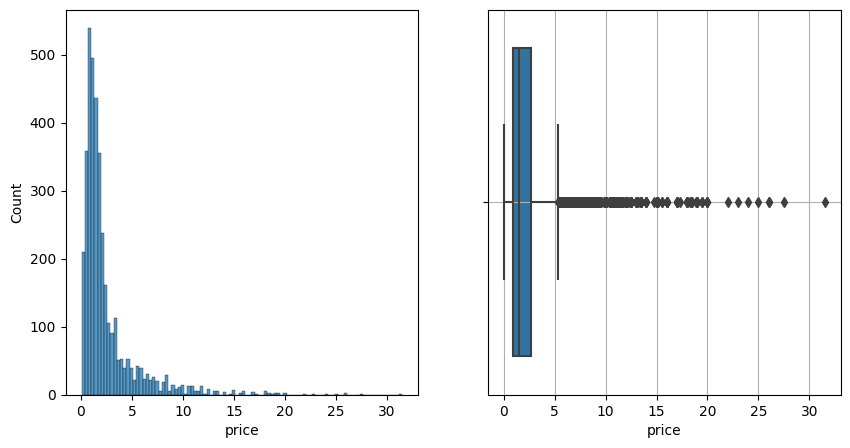

In [103]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins = 100)
plt.subplot(1,2,2)
sns.boxplot(x = df['price'])
plt.grid()

In [104]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
iqr = Q3-Q1
lower = Q1 - 1.5*iqr
upper = Q3 + 1.5*iqr

In [105]:
df[df['price'] > 5.34].shape

(432, 25)

In [106]:
df[df['price'] > 5.34]['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

In [107]:
df[df['price'] > 10].sort_values(by = 'price', ascending = False).sample(10)

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
2573,2573,2641,NaN,11.00,sector 24,28898.0,3806.491799,house,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,NaN,5000.0,NaN,8.0,11.0,3+,3.0,East,old property,1,1,1,1,0,0,39
1765,1765,1813,NaN,11.00,sector 25,35530.0,3095.975232,house,Plot area 344(287.63 sq.m.),NaN,3096.0,NaN,5.0,5.0,3+,2.0,NaN,relatively new,1,1,1,0,1,1,29
836,836,852,NaN,19.00,sector 26,42222.0,4500.023684,house,Plot area 500(418.06 sq.m.),NaN,4500.0,NaN,6.0,8.0,3+,3.0,East,moderately old,1,1,1,0,1,0,103
742,742,758,NaN,10.56,sector 50,32593.0,3239.959501,house,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN,5.0,5.0,3,3.0,NaN,moderately old,1,0,0,0,0,1,20
2143,2143,2201,ss hibiscus,12.25,sector 50,20940.0,5850.047755,house,Plot area 5850(543.48 sq.m.),NaN,5850.0,NaN,5.0,7.0,3+,1.0,South-East,relatively new,1,1,1,1,0,0,160
2363,2363,2428,NaN,18.25,sector 26,18250.0,10000.000000,house,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq...,NaN,NaN,10000.0,7.0,9.0,3+,4.0,East,relatively new,1,1,1,0,1,0,77
1008,1008,1033,unitech espace,11.29,sector 50,34846.0,3239.970154,house,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN,5.0,5.0,3+,2.0,NaN,moderately old,0,1,1,0,0,1,21
487,487,498,unitech escape,12.00,sector 50,37037.0,3240.003240,house,Carpet area: 360 (301.01 sq.m.),NaN,NaN,360.0,5.0,6.0,3+,3.0,East,undefined,0,0,0,0,0,1,66
929,929,950,NaN,17.00,sector 45,37777.0,4500.092649,house,Plot area 4500(418.06 sq.m.),NaN,4500.0,NaN,5.0,8.0,3+,3.0,North-East,relatively new,1,1,1,0,1,2,152
2050,2050,2103,arjun marg/ sector- 26 phase- 1/ golf course road,31.50,sector 26,35000.0,9000.000000,house,Plot area 1000(836.13 sq.m.),NaN,9000.0,NaN,7.0,9.0,3+,3.0,North-East,moderately old,1,1,1,0,1,2,74


There are some outliers in the data which are justified but also thre are some outliers which shows data errors (i.e very small area but high price per sqft which are not justified)

#price_per_sqft

In [108]:
df['price_per_sqft'].describe()

count      3790.000000
mean      13796.386544
std       23037.205578
min           4.000000
25%        6811.000000
50%        9000.000000
75%       13763.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft'>

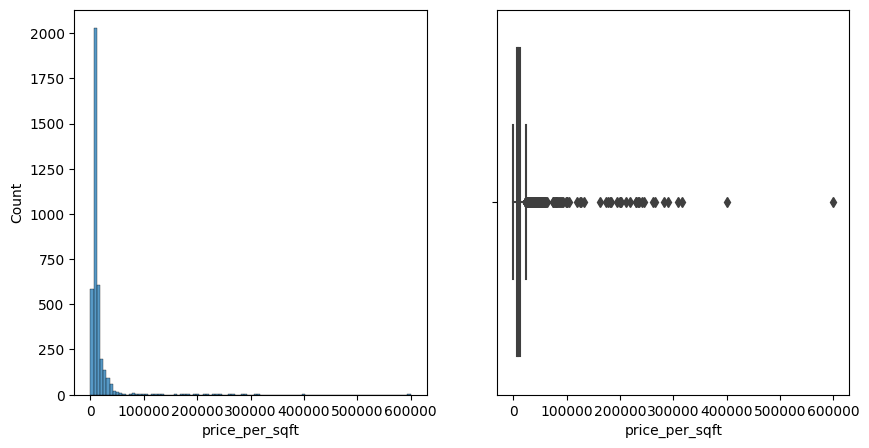

In [109]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['price_per_sqft'], bins = 100)

plt.subplot(1,2,2)
sns.boxplot(x = df['price_per_sqft'])

In [110]:
Q1 = df['price_per_sqft'].describe()['25%']
Q3 = df['price_per_sqft'].describe()['75%']
iqr = Q3-Q1
lower = Q1 - 1.5*iqr
upper = Q3 + 1.5*iqr
lower, upper

(-3617.375, 24191.625)

In [111]:
outliers = df[(df['price_per_sqft'] <lower) | (df['price_per_sqft'] > upper)].sort_values(by = 'price_per_sqft', ascending = False)

In [112]:
outliers.head(2)

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
2815,2815,2890,emaar the palm springs,24.0,sector 54,600000.0,400.0,house,Plot area 400(37.16 sq.m.),NaN,400.0,NaN,5.0,5.0,2,1.0,North-East,old property,1,1,1,0,0,0,122
1575,1575,1619,dlf city plots phase 2,10.0,sector 25,400000.0,250.0,house,Plot area 250(23.23 sq.m.),NaN,250.0,NaN,12.0,12.0,3+,4.0,North,relatively new,1,0,1,0,0,0,114


we can see from the data the area column is not appropriate (i.e not in sq.ft) and it seems in sq.yards format due to this the price per_sq.ft is going out of range

In [113]:
outliers['area'] = outliers['area'].apply(lambda x : x*9 if x < 1000 else x)
outliers['built_up_area'] = outliers['built_up_area'].apply(lambda x : x*9 if x < 1000 else x)
#recalculating price_per_sqft
outliers['price_per_sqft'] = (outliers['price']*10000000) / outliers['area']

In [114]:
outliers['price_per_sqft'].describe()

count      367.000000
mean     29160.748429
std      12308.487534
min       2689.111111
25%      25051.500000
50%      29629.555556
75%      35488.935484
max      82540.000000
Name: price_per_sqft, dtype: float64

In [115]:
#updating original table with re calculated price_per_sqft
df.update(outliers)

<Axes: xlabel='price_per_sqft'>

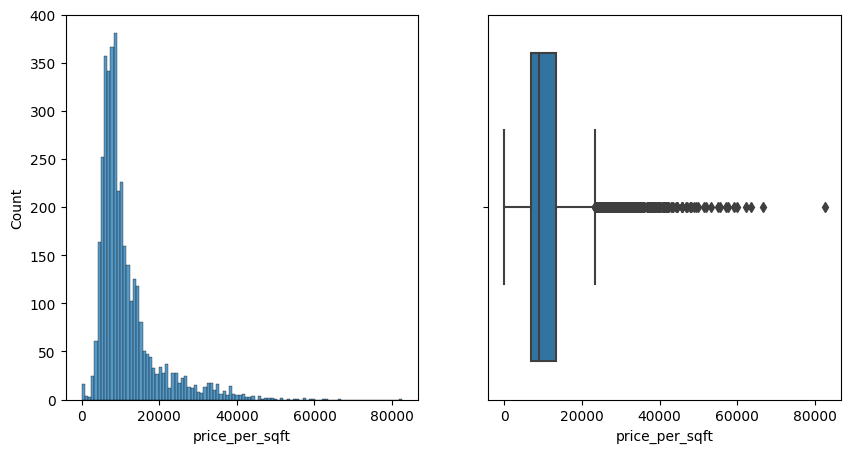

In [116]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['price_per_sqft'], bins = 100)

plt.subplot(1,2,2)
sns.boxplot(x=df['price_per_sqft'])

In [117]:
df['price_per_sqft'][df['price_per_sqft'] >50000].shape

(13,)

#Area

In [118]:
df['area'].describe()

count      3790.000000
mean       2904.372400
std       22768.129186
min         145.006344
25%        1260.000000
50%        1746.500000
75%        2343.000000
max      875000.000000
Name: area, dtype: float64

In [119]:
#quantiles
df['area'].quantile([0.9,0.95,0.98,0.99])

0.90    3239.974080
0.95    4500.035408
0.98    6227.942703
0.99    8264.660433
Name: area, dtype: float64

<Axes: xlabel='area'>

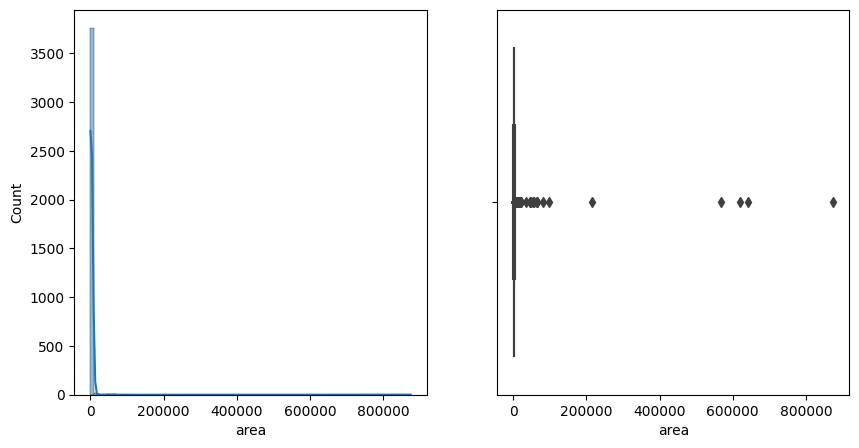

In [120]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['area'],bins = 100, kde = True)

plt.subplot(1,2,2)
sns.boxplot(x=df['area'])

In [121]:
Q1 = df['area'].describe()['25%']
Q3 = df['area'].describe()['75%']
iqr = Q3-Q1
lower = Q1 - 1.5*iqr
upper = Q3 + 1.5*iqr

lower, upper

(-364.5, 3967.5)

In [122]:
df[df['area'] > 100000]

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
423,423.0,433.0,signature global solera 2,0.51,sector 107,9.0,566667.000000,flat,Carpet area: 514396 (47788.95 sq.m.),NaN,NaN,514396.0,2.0,2.0,1,3.0,North,new Property,0.0,0.0,0.0,0.0,0.0,1.0,44.0
819,819.0,835.0,ramsons kshitij,0.31,sector 95,5.0,620000.000000,flat,Carpet area: 607936 (56479.1 sq.m.),NaN,NaN,607936.0,2.0,2.0,1,1.0,North-East,relatively new,0.0,0.0,1.0,1.0,0.0,1.0,65.0
856,856.0,873.0,NaN,5.00,sector 50,232.0,215517.241379,house,Plot area 2(1011.71 sq.m.),NaN,2.0,NaN,6.0,5.0,3+,2.0,NaN,new Property,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1699,1699.0,1746.0,signature the roselia,0.45,sector 95,7.0,642857.000000,flat,Carpet area: 569243 (52884.41 sq.m.),NaN,NaN,569243.0,2.0,2.0,2,2.0,South-West,new Property,0.0,0.0,0.0,0.0,0.0,1.0,76.0
3044,3044.0,3121.0,hcbs sports ville,0.35,sohna road,4.0,875000.000000,flat,Built Up area: 737147 (68483.2 sq.m.),NaN,737147.0,NaN,2.0,2.0,2,8.0,NaN,relatively new,0.0,0.0,0.0,0.0,0.0,2.0,44.0


sice it seems like there is an issue with the entered data.The properties that have price above 100000 have very lesss price also impossibly less price per sqft so we will remove such rows

In [123]:
df = df[df['area'] < 100000]

<Axes: xlabel='area'>

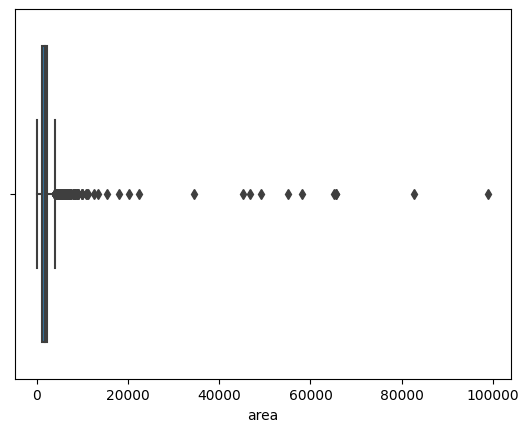

In [124]:
sns.boxplot(x = df['area'])

In [125]:
df['area'].describe()

count     3785.000000
mean      2136.731877
std       3562.004788
min        145.006344
25%       1259.000000
50%       1745.000000
75%       2340.027229
max      98977.945132
Name: area, dtype: float64

In [126]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [127]:
df[df['area'] > 10000]

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
73,73.0,74.0,godrej air,2.50,sector 85,1379.0,18129.000000,flat,Carpet area: 18122 (1683.59 sq.m.),NaN,NaN,18122.0,4.0,5.0,3+,16.0,North-East,under construction,0.0,1.0,1.0,1.0,0.0,0.0,44.0
168,168.0,173.0,NaN,18.40,sector 26,1859.0,98977.945132,house,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,NaN,NaN,99000.0,6.0,8.0,3+,4.0,South,relatively new,1.0,1.0,0.0,0.0,1.0,0.0,60.0
433,433.0,443.0,NaN,27.50,sector 43,24366.0,11286.218501,house,Plot area 1254(1048.5 sq.m.),NaN,11286.0,NaN,6.0,7.0,3+,3.0,North-East,relatively new,1.0,1.0,1.0,1.0,0.0,0.0,42.0
440,440.0,451.0,unitech aspen greens,6.95,sector 50,4490.0,15478.841871,house,Plot area 240(200.67 sq.m.)Built Up area: 2160...,NaN,19440.0,15480.0,3.0,3.0,1,2.0,North-East,moderately old,1.0,0.0,0.0,0.0,0.0,1.0,160.0
484,484.0,495.0,rof ananda,0.38,sector 95,58.0,65517.000000,flat,Carpet area: 64412 (5984.07 sq.m.),NaN,NaN,64412.0,3.0,2.0,1,12.0,North,relatively new,0.0,0.0,0.0,0.0,0.0,1.0,51.0
538,538.0,550.0,m3m golfestate,13.20,sector 65,12000.0,11000.000000,flat,Carpet area: 11000 (1021.93 sq.m.),NaN,NaN,11000.0,4.0,4.0,3,13.0,North,moderately old,1.0,0.0,0.0,0.0,0.0,1.0,60.0
1109,1109.0,1136.0,NaN,5.50,sohna road road,5093.0,10799.136069,house,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,NaN,31500.0,NaN,3.0,3.0,3+,2.0,West,moderately old,1.0,1.0,1.0,1.0,0.0,1.0,49.0
1130,1130.0,1160.0,godrej icon,1.75,sector 88a,1384.0,12645.000000,flat,Carpet area: 1175.11,NaN,12572.5,NaN,3.0,3.0,3+,6.0,NaN,new Property,0.0,0.0,0.0,0.0,0.0,1.0,55.0
1221,1221.0,1252.0,NaN,6.25,sector 57,2778.0,22498.200144,house,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,NaN,23940.0,22500.0,9.0,9.0,3+,3.0,North-East,new Property,1.0,0.0,0.0,0.0,0.0,0.0,61.0
1410,1410.0,1446.0,ramsons kshitij,0.24,sector 95,53.0,45283.000000,flat,Carpet area: 45966 (4270.38 sq.m.),NaN,NaN,45966.0,2.0,2.0,1,10.0,North-West,relatively new,0.0,0.0,0.0,1.0,0.0,1.0,33.0


In [128]:
#3405, 3691,3782, 3008 -- 2 bed rooms in very large area
#440 -- correction

In [129]:
df.drop([3405, 3691,3782, 3008,3661,1831,1410,484,168,2506,3590, 1221], inplace = True)

In [130]:
df[df['area'] > 10000]

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
73,73.0,74.0,godrej air,2.50,sector 85,1379.0,18129.000000,flat,Carpet area: 18122 (1683.59 sq.m.),NaN,NaN,18122.0,4.0,5.0,3+,16.0,North-East,under construction,0.0,1.0,1.0,1.0,0.0,0.0,44.0
433,433.0,443.0,NaN,27.50,sector 43,24366.0,11286.218501,house,Plot area 1254(1048.5 sq.m.),NaN,11286.0,NaN,6.0,7.0,3+,3.0,North-East,relatively new,1.0,1.0,1.0,1.0,0.0,0.0,42.0
440,440.0,451.0,unitech aspen greens,6.95,sector 50,4490.0,15478.841871,house,Plot area 240(200.67 sq.m.)Built Up area: 2160...,NaN,19440.0,15480.0,3.0,3.0,1,2.0,North-East,moderately old,1.0,0.0,0.0,0.0,0.0,1.0,160.0
538,538.0,550.0,m3m golfestate,13.20,sector 65,12000.0,11000.000000,flat,Carpet area: 11000 (1021.93 sq.m.),NaN,NaN,11000.0,4.0,4.0,3,13.0,North,moderately old,1.0,0.0,0.0,0.0,0.0,1.0,60.0
1109,1109.0,1136.0,NaN,5.50,sohna road road,5093.0,10799.136069,house,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,NaN,31500.0,NaN,3.0,3.0,3+,2.0,West,moderately old,1.0,1.0,1.0,1.0,0.0,1.0,49.0
1130,1130.0,1160.0,godrej icon,1.75,sector 88a,1384.0,12645.000000,flat,Carpet area: 1175.11,NaN,12572.5,NaN,3.0,3.0,3+,6.0,NaN,new Property,0.0,0.0,0.0,0.0,0.0,1.0,55.0
2773,2773.0,2845.0,NaN,5.50,sector 43,2716.0,20250.368189,house,Plot area 215(179.77 sq.m.)Built Up area: 2850...,NaN,25650.0,20250.0,8.0,7.0,3+,3.0,East,moderately old,1.0,1.0,1.0,1.0,0.0,0.0,123.0
2948,2948.0,3025.0,NaN,0.85,sector 4,630.0,13492.063492,house,Plot area 1500(1254.19 sq.m.),NaN,13500.0,NaN,3.0,3.0,1,1.0,North,relatively new,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [131]:
df['area'].describe()

count     3773.000000
mean      1960.806423
std       1315.940331
min        145.006344
25%       1257.000000
50%       1744.000000
75%       2325.000000
max      20250.368189
Name: area, dtype: float64

<Axes: xlabel='area'>

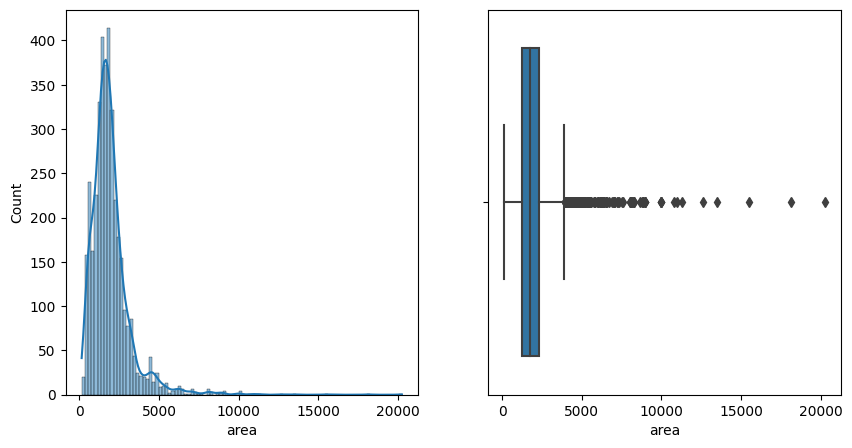

In [132]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['area'],bins = 100, kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = df['area'])

#Bedroom

In [133]:
df['bedRoom'].describe()

count    3773.000000
mean        3.326001
std         1.855963
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [134]:
df['bedRoom'].quantile([0.9,0.95,0.99])

0.90     5.0
0.95     6.0
0.99    12.0
Name: bedRoom, dtype: float64

we will limit the number of bedroos to 12

In [135]:
df = df[df['bedRoom']<12]

<Axes: xlabel='bedRoom'>

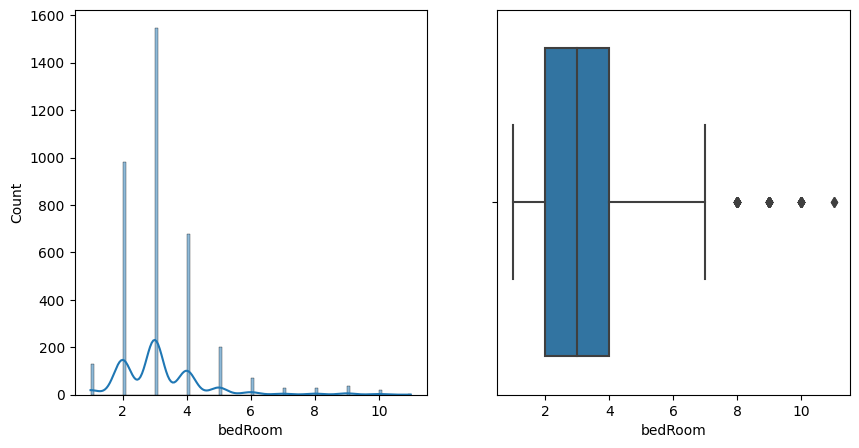

In [136]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(x = df['bedRoom'], bins = 100, kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = df['bedRoom'])

Bathrooms

In [137]:
df['bathroom'].describe()

count    3724.000000
mean        3.258593
std         1.450775
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [138]:
df.shape

(3724, 25)

#super_built_up_area

In [139]:
df.head(2)

,level_0,index,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
0,0.0,0.0,ireo victory valley,2.99,sector 67,11832.0,2527.0,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,2527.040803,2200.0,2100.0,3.0,3.0,3,4.0,East,relatively new,1.0,0.0,0.0,0.0,0.0,0.0,37.0
1,1.0,1.0,signature global park,0.58,sohna road,7056.0,822.0,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,NaN,822.0,600.0,2.0,2.0,2,3.0,NaN,undefined,0.0,0.0,0.0,0.0,0.0,1.0,58.0


In [140]:
df['super_built_up_area'].describe()

count    1912.000000
mean     1926.267409
std       762.468926
min       324.962141
25%      1468.761065
50%      1828.033137
75%      2214.995342
max      9999.986017
Name: super_built_up_area, dtype: float64

In [ ]:
sns.boxplot(x = df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

In [ ]:
df[df['super_built_up_area'] > 9000]

#built_up_area

In [ ]:
df['built_up_area'].describe()

we can see the min built_up_area is 14 and max is 67050 i.e there sre so many outliers in built_up_area

In [ ]:
sns.histplot(df['built_up_area'], bins = 100, kde =True)

In [ ]:
df['built_up_area'].quantile([0.01,0.05,0.1,0.95,0.99])

In [ ]:
df[df['built_up_area'] <= 169.16].shape

In [ ]:
df[df['built_up_area'] <= 169.16].sample(5)

In [ ]:
def extract_built_up (x):
  pattern_1 = r"Built Up area: ([-+]?\d*\.\d+|\d+) sq\.ft\. \((\d+\.\d+) sq\.m\.\)"
  pattern_2 = r"Built Up area: ([-+]?\d*\.\d+|\d+) \((\d+\.\d+) sq\.m\.\)"
  #pattern_3 = r"Built Up area: ([-+]?\d*\.\d+|\d+) sq\.yards\ \((\d+\.\d+) sq\.m\.\)"
  pattern_4 = r"Plot area \d+(\.\d+)?\(\d+\.\d+ sq\.m\.\)"
  pattern_5 = r'Plot area (\b\d+\b)'
  match_1 = re.search(pattern_1, x)
  match_2 = re.search(pattern_2, x)
  #match_3 = re.search(pattern_3, x)
  match_4 = re.search(pattern_4, x)
  match_5 = re.search(pattern_5, x)
  if match_1:
   return float(match_1.group(1))
  elif match_2:
   return float(match_2.group(2))*10.7
  #elif match_3:
   #return float(match_3.group(1))*9.0
  elif match_4:
   patt = r"\((\d+\.\d+)\s*sq\.m\.\)"
   tx = re.search(pattern_4, x).group(0)
   match_4 = re.search(patt, tx)
   return float(match_4.group(1))*10.7
  elif match_5:
   return  float(match_5.group(1))
  else:
   return None

In [ ]:
df['built_up_area'] = df['areaWithType'].apply(extract_built_up)

In [ ]:
df['built_up_area'].describe()

In [ ]:
df['built_up_area'].quantile([0.04,0.10,0.90,0.99])

In [ ]:
df[df['built_up_area'] <= 181.31272].shape

Since built_up_area less than 181 is not possible we will remove thise rows

In [ ]:
df.drop(df[df['built_up_area'] <= 181.31272].index, inplace = True)

In [ ]:
df['built_up_area'].quantile([0.04,0.10,0.90,0.99])

In [ ]:
#there are some cases where number of rooms in given area are very high so we will take a ratio of area to the room and set the threshold of 2perecntile below this threshold we will remove the rows
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

In [ ]:
df = df[(df['area']/df['bedRoom'])>198]

In [ ]:
df['built_up_area'].describe()

In [ ]:
df[df['built_up_area'] > 9000.0]

while doing outlier treatment I found that most of the values in built_up_area was not appropriate due to the function which is populating built_up_area was not working well so i did correction and automaticall all the outliers goes away

In [ ]:
df.loc[1481, 'areaWithType'] = 4550*9

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['built_up_area'], kde = True, bins = 100)

plt.subplot(1,2,2)
sns.boxplot(x = df['built_up_area'])

#carpet area

In [ ]:
sns.boxplot(x = df['carpet_area'])

there were areas which was not justified becaue no of bedrooms given in those is practically not possible so we will remove those rows

In [ ]:
df['carpet_area'].describe()

In [ ]:
df['carpet_area'].quantile([0.01,0.10,0.10,0.90,.95,0.99])

In [ ]:
(df['carpet_area']/df['bedRoom']).quantile([0.01,0.02,0.05])

In [ ]:
#rows which have more number of flats in very small area
df[(df['carpet_area']/df['bedRoom']) < 212.4]

Ther is isssue in our function it is populating carpetr_area column wrongly

In [ ]:
def carpet (x):
  x = str(x)
  pattern_1 = r"Carpet area: ([-+]?\d*\.\d+|\d+) sq\.ft\. \((\d+\.\d+) sq\.m\.\)"
  pattern_2 = r"Carpet area: ([-+]?\d*\.\d+|\d+) \((\d+\.\d+) sq\.m\.\)"
  pattern_3 = r'Carpet area: ([-+]?\d*\.\d+|\d+)\s*sq\.yards'
  pattern_4 = r"Carpet area: ([-+]?\d*\.\d+|\d+) sq\.ft\."
  match_1 = re.search(pattern_1, x)
  match_2 = re.search(pattern_2, x)
  match_3 = re.search(pattern_3, x)
  match_4 = re.search(pattern_4, x)
  if match_1:
   return float(match_1.group(1))
  elif match_2:
    return float(match_2.group(2))*10.7
  elif match_3:
   return float(match_3.group(1))*9.0
  elif match_4:
   return  float(match_4.group(1))
  else:
   return None

In [ ]:
carpet('Carpet area: 180 (150.5 sq.m.)')

In [ ]:
df['carpet_area'] = df['areaWithType'].apply(carpet)

df['carpet_area'].describe()

In [ ]:
(df['carpet_area']/df['bedRoom']).quantile([0.01,0.02,0.05])

In [ ]:
#droping the rows having area to bedroom ratio less than 212.4
df.drop(df[(df['carpet_area']/df['bedRoom']) < 212.4].index, inplace = True)

In [ ]:
df['carpet_area'].quantile([0.01,0.02,0.9,0.95,0.99])

In [ ]:
df[df['carpet_area'] > 6000].sample(2)

In [ ]:
# 1275 no of bedrooms i this row is far more than its area so we will drop this row
#df.drop(1275, inplace = True, axis = 1)

outliers in arpet area are geniune and there is no data error so we can not remove thwm

In [ ]:
df.shape

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(x = df['super_built_up_area'])
plt.subplot(1,3,2)
sns.boxplot(x = df['built_up_area'])
plt.subplot(1,3,3)
sns.boxplot(x = df['carpet_area'])

In [ ]:
df[['super_built_up_area', 'built_up_area', 'carpet_area']].describe()

##luxary score

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['luxary_score'])
plt.subplot(1,2,2)
sns.histplot(df['luxary_score'], kde = True, bins = 100)

#Price_per_sqft

In [ ]:
df['price_per_sqft'].quantile([0.01,0.90,0.995,0.99])

In [ ]:
df[df['price_per_sqft'] > 38580]

In [ ]:
df.drop(2815, inplace = True)

In [ ]:
df['price_per_sqft'].describe()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['price_per_sqft'])
plt.subplot(1,2,2)
sns.boxplot(x = df['price_per_sqft'])

In [ ]:
df[df['price_per_sqft'] > 42000]

In [ ]:
x = df[df['price_per_sqft'] <= 20000]
(x['area'] / x['bedRoom']).quantile([0.02])

In [ ]:
df[(df['area'] / df['bedRoom']) < 246.5]

We can see the problem here. number of flats in the given area is very high.
The reason for this could be is the multilayer house. so it is possible that in the area of 1700 there are 8 bedrroms and 3 floors. so it indicates in the area of 1700 there is is 3 floor house and each floor have around 3 bedrooms. so to indicate this properly we should mention 3 bedrooms in 1700 area

In [ ]:
#adding a column area/bedroom
df['area_bedroom_ratio'] = round(df['area']/df['bedRoom'])

In [ ]:
df.sort_values(by = 'area_bedroom_ratio', ascending = True).head(5)

In [ ]:
outliers = df[(df['area_bedroom_ratio'] < 246.5) & (df['bedRoom'] > 3)]

In [ ]:
outliers.shape

In [ ]:
outliers['bedRoom'] = round(outliers['bedRoom']/outliers['floorNum'])

In [ ]:
outliers

In [ ]:
df.update(outliers)

In [ ]:
df[(df['area_bedroom_ratio'] < 246.5) & (df['bedRoom'] > 3)]

In [ ]:
df.drop(df[(df['area_bedroom_ratio'] < 246.5) & (df['bedRoom'] > 3)].index, inplace = True)

In [ ]:
df.shape

so now we have treated the outliers in price_per_sqft. (outliers was there because of no of bedrroms in a given area was more)

In [ ]:
df.to_csv('gurgaon_properties_outliers_trated')